In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")





In [8]:
# Perform EDA
print(merged_data.describe())
print(merged_data.isnull().sum())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/2213870147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


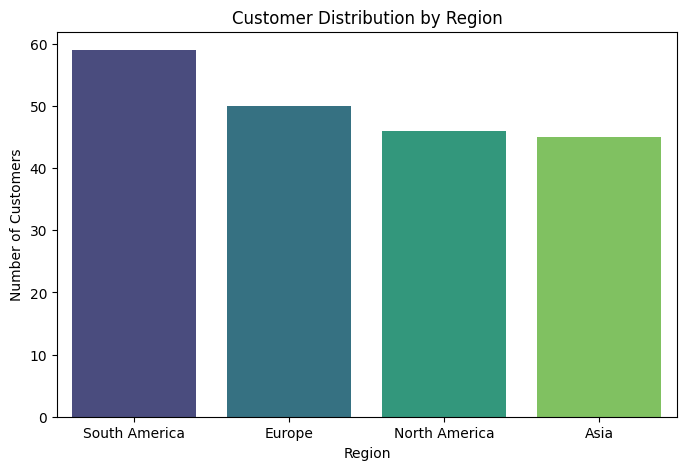

In [9]:
# Region-wise customer distribution
region_counts = customers["Region"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/1737833483.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  signup_trends = customers.set_index("SignupDate").resample("M").size()


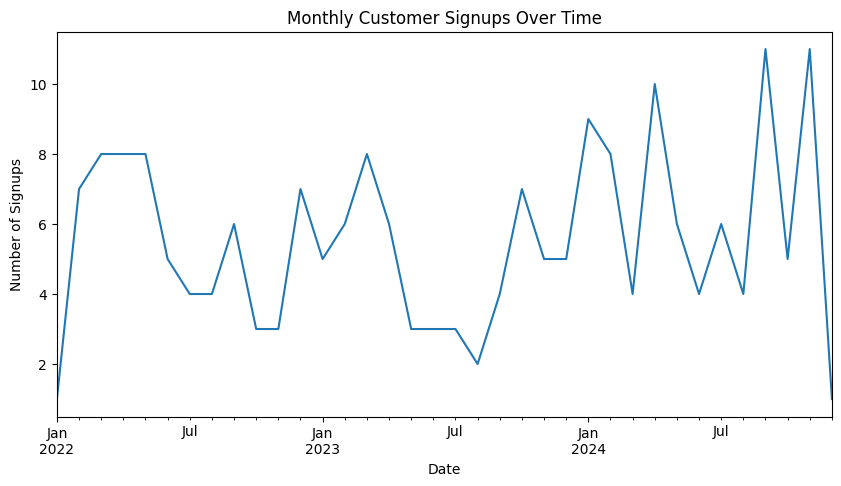

In [10]:
# Signup trends over time
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signup_trends = customers.set_index("SignupDate").resample("M").size()
plt.figure(figsize=(10, 5))
signup_trends.plot()
plt.title("Monthly Customer Signups Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.show()

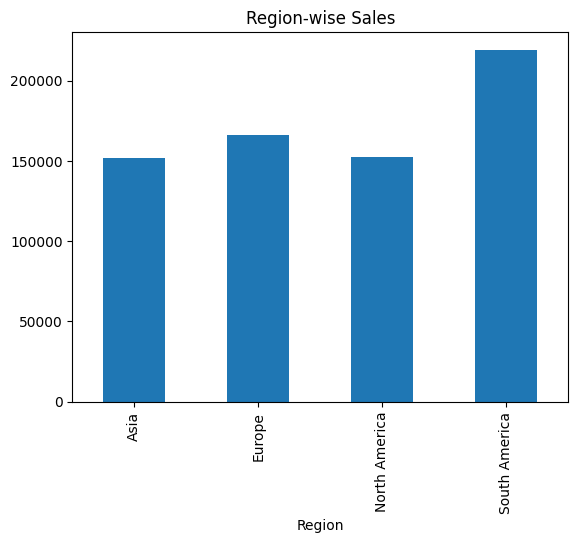

In [6]:
# Example: Region-wise sales
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
region_sales.plot(kind="bar")
plt.title("Region-wise Sales")
plt.show()

/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/3711018730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


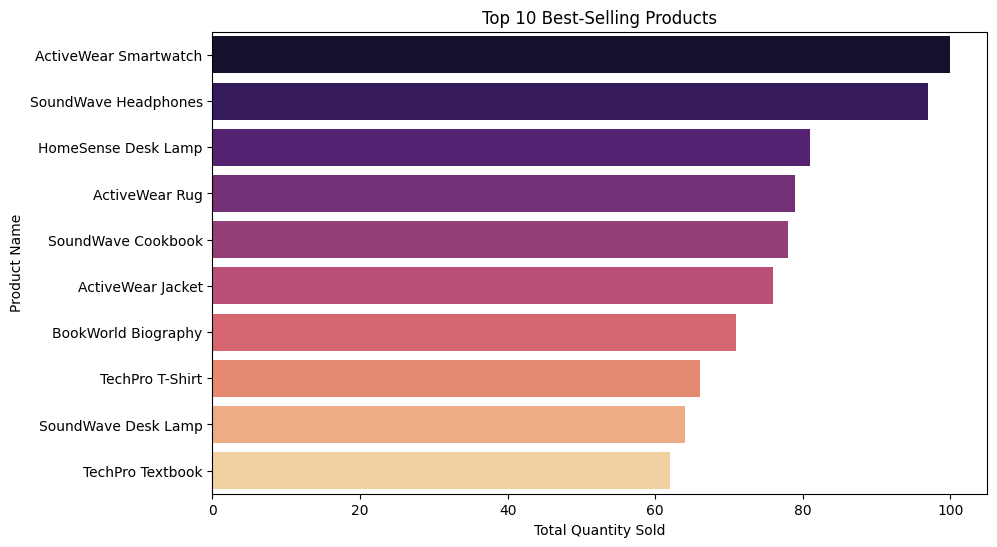

/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/3711018730.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="plasma")


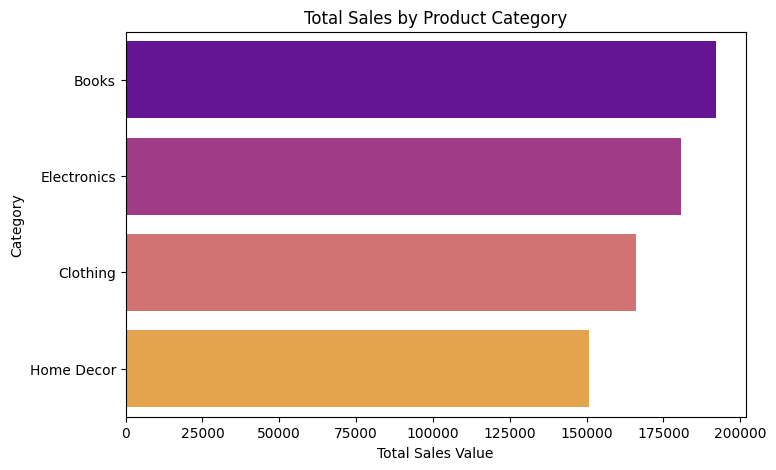

In [11]:
# Top-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# Top-selling categories
top_categories = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="plasma")
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales Value")
plt.ylabel("Category")
plt.show()

/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/1652906368.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum()


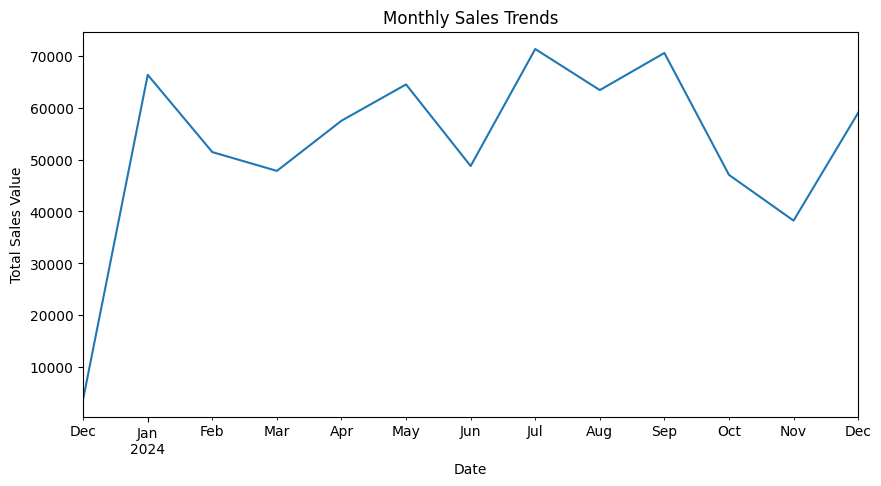

/var/folders/qz/w0lc2b0d5ydbw64vj7dvtg480000gn/T/ipykernel_5622/1652906368.py:14: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = merged_data.set_index("TransactionDate").resample("Q")["TotalValue"].sum()


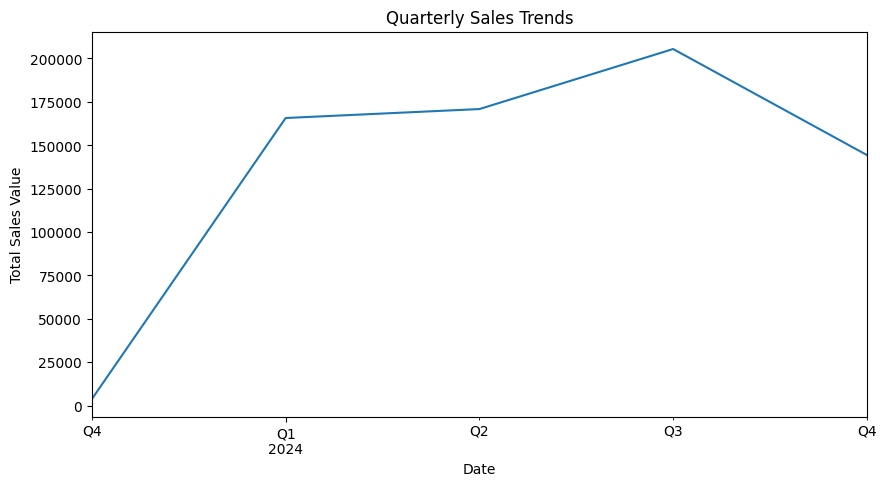

In [12]:
# Convert TransactionDate to datetime
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])

# Monthly sales trends
monthly_sales = merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales Value")
plt.show()

# Quarterly sales trends
quarterly_sales = merged_data.set_index("TransactionDate").resample("Q")["TotalValue"].sum()
plt.figure(figsize=(10, 5))
quarterly_sales.plot()
plt.title("Quarterly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales Value")
plt.show()


In [13]:
# Calculate CLV
clv = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spend
    "TransactionID": "nunique"  # Number of transactions
}).reset_index()
clv["CLV"] = clv["TotalValue"] / clv["TransactionID"]  # Average spend per transaction

# Top 10 high-value customers
top_clv = clv.sort_values(by="CLV", ascending=False).head(10)
print("Top 10 High-Value Customers by CLV:")
print(top_clv)

Top 10 High-Value Customers by CLV:
    CustomerID  TotalValue  TransactionID          CLV
39       C0040     3969.40              3  1323.133333
88       C0089     2556.22              2  1278.110000
65       C0066     3799.28              3  1266.426667
167      C0168     5053.83              4  1263.457500
194      C0196     4982.88              4  1245.720000
95       C0096     6072.92              5  1214.584000
113      C0114     5780.43              5  1156.086000
183      C0185     3424.32              3  1141.440000
137      C0138     5610.25              5  1122.050000
147      C0148     5457.79              5  1091.558000


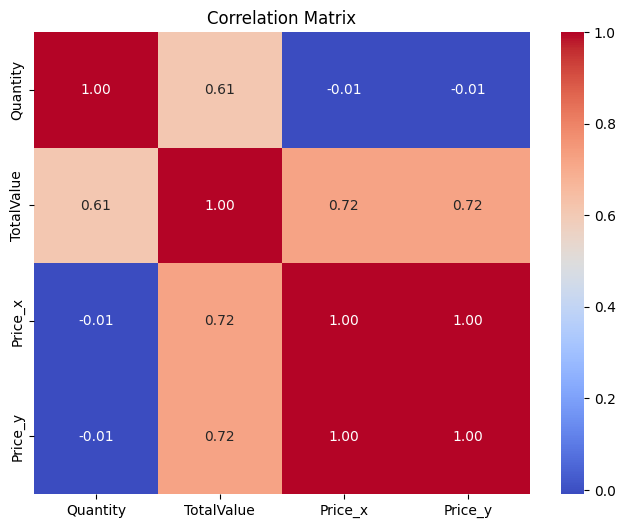

In [14]:
# Correlation matrix
corr_matrix = merged_data[["Quantity", "TotalValue", "Price_x", "Price_y"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()